# Intro

This data QCs the Kang et.al. data to make sure everything looks good.
The data was retreived using  the SeuratData package in R and then translated into an AnnData object to be read into python,
Notebook for SeuratData analysis of Kang data (names ifnb in SeuratData): https://satijalab.org/seurat/articles/integration_introduction.html
Seurat Disk was used for conversion between h5Seurat and AnnData: https://mojaveazure.github.io/seurat-disk/articles/convert-anndata.html

Kang data is originally from here: 
Kang, Hyun Min, et al. "Multiplexed droplet single-cell RNA-sequencing using natural genetic variation." Nature biotechnology 36.1 (2018): 89-94.

This based off of the tutorial from scanpy using pbmc 3K.
https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

And heavily influenced by https://github.com/theislab/scanpy_usage/blob/master/170503_zheng17/zheng17.ipynb

# Imports

In [1]:
import sys
sys.path.insert(1, '../../')
sys.path.insert(1, '../')
from sc_preprocessing import sc_preprocess


# general imports
import warnings
import numpy as np
import os
import pandas as pd
import scipy as sp
from scipy.sparse import coo_matrix
import collections
import scanpy as sc


# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
import sklearn as sk

# matplotlib settings for Jupyter notebooks only
%matplotlib inline

import pickle
import gzip
from pathlib import Path


# Parameters

In [2]:
# parameters

aug_data_path = f"{os.getcwd()}/../../data/single_cell_data/augmented_kang_data/"
cibersort_path = f"{os.getcwd()}/../../data/single_cell_data/cibersort_kang/"
data_path = f"{os.getcwd()}/../../data/single_cell_data/kang_rybakov/"


num_cells_vec = [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]


#####################
### set the study ###
#####################

res_name = "none-kang"
in_name = "ifnb_processed"
processed_sc_file = f"{data_path}/{in_name}.h5ad"



# Load and Process data

### Read in data and metadata

In [3]:
# read in the data

adata = sc.read_h5ad(processed_sc_file)

adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`



In [4]:
# format metadata

adata.obs['CellType'] = adata.obs['seurat_names_merged'].tolist()
adata.obs['scpred_CellType'] = adata.obs['seurat_names_merged'].tolist()
adata.obs['sample_id'] = [str(x) for x in adata.obs['sample_id'].tolist()]

adata.var['gene_ids'] = adata.var['gene_annot'].tolist()


In [5]:
np.where(adata.var['gene_ids'] == "GNLY")

(array([1703]),)

In [6]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,stim,seurat_annotations,seurat_names,seurat_names_merged,BARCODE,sample_id,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,CellType,scpred_CellType
AAACATACATTTCC.1,IMMUNE_CTRL,3017.0,877,CTRL,0,CD14_Mono,CD14_Mono,AAACATACATTTCC.1CTRL,1016,877,877,3017.0,0.0,0.0,CD14_Mono,CD14_Mono
AAACATACCAGAAA.1,IMMUNE_CTRL,2481.0,713,CTRL,0,CD14_Mono,CD14_Mono,AAACATACCAGAAA.1CTRL,1256,713,713,2481.0,0.0,0.0,CD14_Mono,CD14_Mono
AAACATACCTCGCT.1,IMMUNE_CTRL,3420.0,850,CTRL,0,CD14_Mono,CD14_Mono,AAACATACCTCGCT.1CTRL,1256,850,850,3420.0,0.0,0.0,CD14_Mono,CD14_Mono
AAACATACCTGGTA.1,IMMUNE_CTRL,3156.0,1109,CTRL,11,pDC,DC,AAACATACCTGGTA.1CTRL,1039,1109,1109,3156.0,0.0,0.0,DC,DC
AAACATACGATGAA.1,IMMUNE_CTRL,1868.0,634,CTRL,2,CD4_Mem_T,CD4_Mem_T,AAACATACGATGAA.1CTRL,1488,634,634,1868.0,0.0,0.0,CD4_Mem_T,CD4_Mem_T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCATGAACGAA.1,IMMUNE_STIM,5577.0,1237,STIM,8,DC,DC,TTTGCATGAACGAA.1STIM,1244,1237,1237,5577.0,0.0,0.0,DC,DC
TTTGCATGACGTAC.1,IMMUNE_STIM,1364.0,536,STIM,2,CD4_Mem_T,CD4_Mem_T,TTTGCATGACGTAC.1STIM,1488,536,536,1364.0,0.0,0.0,CD4_Mem_T,CD4_Mem_T
TTTGCATGCCTGTC.1,IMMUNE_STIM,2114.0,817,STIM,4,B,B,TTTGCATGCCTGTC.1STIM,1256,817,817,2114.0,0.0,0.0,B,B
TTTGCATGCTAAGC.1,IMMUNE_STIM,1522.0,523,STIM,1,CD4_Naive_T,CD4_Naive_T,TTTGCATGCTAAGC.1STIM,107,523,523,1522.0,0.0,0.0,CD4_Naive_T,CD4_Naive_T


### Preprocess

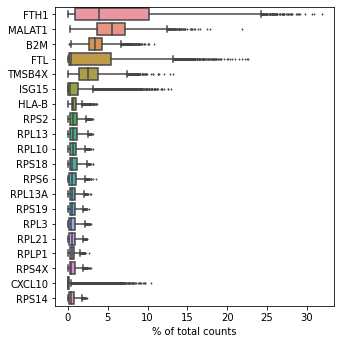

In [7]:
sc.pl.highest_expr_genes(adata, n_top=20, )


In [8]:
# check we don't have any weird cell types
adata.obs["scpred_CellType"].value_counts()


CD14_Mono      4361
CD4_Naive_T    2504
CD4_Mem_T      1762
B              1363
CD16_Mono      1044
CD8_T           813
T_Act           633
NK              619
DC              604
Mk              236
Name: scpred_CellType, dtype: int64

In [9]:
# write out data for BP and cibersort
dense_matrix = adata.X.todense()

sc_profile_file = os.path.join(aug_data_path, f"{res_name}_sig.pkl")
sc_profile_path = Path(sc_profile_file)

dense_df = pd.DataFrame(dense_matrix, columns = adata.var['gene_ids'])
dense_df.insert(loc=0, column='scpred_CellType', value=adata.obs["scpred_CellType"].to_list())


pickle.dump( dense_df, open( sc_profile_path, "wb" ) )


In [10]:
dense_matrix.shape

(13939, 13452)

# Plot Data

         Falling back to preprocessing with `sc.pp.pca` and default params.


OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/beevol/home/davidson/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'sample_id' as categorical
/beevol/home/davidson/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'CellType' as categorical
/beevol/home/davidson/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-p

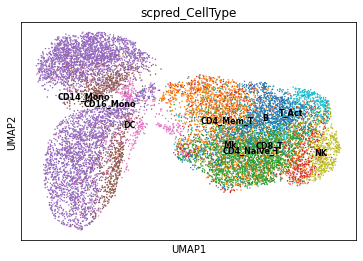

In [11]:
# valculate neighborhood graph
sc.pp.neighbors(adata)

# make umap
sc.tl.umap(adata)

# plot some markers of the RAW data
sc.pl.umap(adata, legend_loc='on data', color='scpred_CellType', legend_fontsize=8)


# Make Pseudobulks

In [12]:
adata.obs["sample_id"].value_counts()


1015    3177
1256    2396
1488    2280
1244    2031
1016    1484
101     1224
1039     679
107      668
Name: sample_id, dtype: int64

In [13]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,stim,seurat_annotations,seurat_names,seurat_names_merged,BARCODE,sample_id,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,CellType,scpred_CellType
AAACATACATTTCC.1,IMMUNE_CTRL,3017.0,877,CTRL,0,CD14_Mono,CD14_Mono,AAACATACATTTCC.1CTRL,1016,877,877,3017.0,0.0,0.0,CD14_Mono,CD14_Mono
AAACATACCAGAAA.1,IMMUNE_CTRL,2481.0,713,CTRL,0,CD14_Mono,CD14_Mono,AAACATACCAGAAA.1CTRL,1256,713,713,2481.0,0.0,0.0,CD14_Mono,CD14_Mono
AAACATACCTCGCT.1,IMMUNE_CTRL,3420.0,850,CTRL,0,CD14_Mono,CD14_Mono,AAACATACCTCGCT.1CTRL,1256,850,850,3420.0,0.0,0.0,CD14_Mono,CD14_Mono
AAACATACCTGGTA.1,IMMUNE_CTRL,3156.0,1109,CTRL,11,pDC,DC,AAACATACCTGGTA.1CTRL,1039,1109,1109,3156.0,0.0,0.0,DC,DC
AAACATACGATGAA.1,IMMUNE_CTRL,1868.0,634,CTRL,2,CD4_Mem_T,CD4_Mem_T,AAACATACGATGAA.1CTRL,1488,634,634,1868.0,0.0,0.0,CD4_Mem_T,CD4_Mem_T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCATGAACGAA.1,IMMUNE_STIM,5577.0,1237,STIM,8,DC,DC,TTTGCATGAACGAA.1STIM,1244,1237,1237,5577.0,0.0,0.0,DC,DC
TTTGCATGACGTAC.1,IMMUNE_STIM,1364.0,536,STIM,2,CD4_Mem_T,CD4_Mem_T,TTTGCATGACGTAC.1STIM,1488,536,536,1364.0,0.0,0.0,CD4_Mem_T,CD4_Mem_T
TTTGCATGCCTGTC.1,IMMUNE_STIM,2114.0,817,STIM,4,B,B,TTTGCATGCCTGTC.1STIM,1256,817,817,2114.0,0.0,0.0,B,B
TTTGCATGCTAAGC.1,IMMUNE_STIM,1522.0,523,STIM,1,CD4_Naive_T,CD4_Naive_T,TTTGCATGCTAAGC.1STIM,107,523,523,1522.0,0.0,0.0,CD4_Naive_T,CD4_Naive_T


In [14]:
adata.obs["scpred_CellType"].unique()

['CD14_Mono', 'DC', 'CD4_Mem_T', 'T_Act', 'CD4_Naive_T', 'CD8_T', 'Mk', 'B', 'CD16_Mono', 'NK']
Categories (10, object): ['B', 'CD4_Mem_T', 'CD4_Naive_T', 'CD8_T', ..., 'DC', 'Mk', 'NK', 'T_Act']

In [15]:
# write out the gene ids
gene_pass = adata.var['gene_ids']
gene_out_file = os.path.join(aug_data_path, f"{res_name}_genes.pkl")
gene_out_path = Path(gene_out_file)
pickle.dump( gene_pass, open( gene_out_path, "wb" ) )


sample_order = ['1015', '1256', '1488', '1244', '1016', '101', '1039', '107']
stim_order = ['STIM', 'CTRL']

# no cell noise 
len_vector = adata.obs["scpred_CellType"].unique().shape[0]
cell_noise = [np.random.lognormal(0, 0, adata.var['gene_ids'].shape[0]) for i in range(len_vector)]


# simulate different number of cells
num_samples = 1000
num_cells = 5000
idx = 0
for curr_samp in sample_order:
  for curr_stim in stim_order:

    # we will only use the CTRL samples
    # this is the baseline negative ctrl
    subset_idx = np.logical_and(adata.obs.sample_id == curr_samp, adata.obs.stim == 'CTRL')
    

    temp_adata = adata[subset_idx]
    print(f"New Domain {idx}")
    pbmc_rep1_pseudobulk_file = os.path.join(aug_data_path, f"{res_name}_pseudo_{idx}.pkl")
    pbmc_rep1_prop_file = os.path.join(aug_data_path, f"{res_name}_prop_{idx}.pkl")
    test_pbmc_rep1_pseudobulk_file = os.path.join(aug_data_path, f"{res_name}_testpseudo_{idx}.pkl")
    test_pbmc_rep1_prop_file = os.path.join(aug_data_path, f"{res_name}_testprop_{idx}.pkl")

    idx = idx + 1

    pseudobulk_path = Path(pbmc_rep1_pseudobulk_file)
    prop_path = Path(pbmc_rep1_prop_file)
    test_pseudobulk_path = Path(test_pbmc_rep1_pseudobulk_file)
    test_prop_path = Path(test_pbmc_rep1_prop_file)

    if not pseudobulk_path.is_file(): # skip if we already generated it

      # make the pseudobulks
      prop_df, pseudobulks_df, test_prop_df, test_pseudobulks_df = sc_preprocess.make_prop_and_sum(temp_adata, 
                                                                              num_samples, 
                                                                              num_cells,
                                                                              use_true_prop=False,
                                                                              cell_noise=cell_noise)

      # make the proportions instead of cell counts
      prop_df = prop_df.div(prop_df.sum(axis=1), axis=0)
      test_prop_df = test_prop_df.div(test_prop_df.sum(axis=1), axis=0)

      pickle.dump( prop_df, open( prop_path, "wb" ) )
      pickle.dump( pseudobulks_df, open( pseudobulk_path, "wb" ) )

      pickle.dump( test_prop_df, open( test_prop_path, "wb" ) )
      pickle.dump( test_pseudobulks_df, open( test_pseudobulk_path, "wb" ) )


      if not np.all(np.isclose(prop_df.sum(axis=1), 1.)):
          assert False, "Proportions do not sum to 1"



New Domain 0
0
100
200
300
400
500
600
700
800
900
1000
New Domain 1
0
100
200
300
400
500
600
700
800
900
1000
New Domain 2
0
100
200
300
400
500
600
700
800
900
1000
New Domain 3
0
100
200
300
400
500
600
700
800
900
1000
New Domain 4
0
100
200
300
400
500
600
700
800
900
1000
New Domain 5
0
100
200
300
400
500
600
700
800
900
1000
New Domain 6
0
100
200
300
400
500
600
700
800
900
1000
New Domain 7
0
100
200
300
400
500
600
700
800
900
1000
New Domain 8
0
100
200
300
400
500
600
700
800
900
1000
New Domain 9
0
100
200
300
400
500
600
700
800
900
1000
New Domain 10
0
100
200
300
400
500
600
700
800
900
1000
New Domain 11
0
100
200
300
400
500
600
700
800
900
1000
New Domain 12
0
100
200
300
400
500
600
700
800
900
1000
New Domain 13
0
100
200
300
400
500
600
700
800
900
1000
New Domain 14
0
100
200
300
400
500
600
700
800
900
1000
New Domain 15
0
100
200
300
400
500
600
700
800
900
1000
